<h1>Задание</h1>

**Интернет-магазин «Фитнес-мания», занимающейся продажей спортивных товаров,
хочет увеличить количество клиентов, которые переходят на сайт через
email-рассылки. Для этого команда планирует провести A/B-тестирование.
Что нужно сделать**

---

<h2>Задание 1.</h2>

**Перед вами представлен набор гипотез со средними оценками от членов команды.
А/В-тестирование продакт планирует запустить в ближайшую неделю.
Проанализируйте таблицу и выберете гипотезу, которую следуют взять в работу в
первую очередь. Объясните свой выбор гипотезы.**



В работу возьмем гипотезу
"Улучшить мобильную версию
сайта, чтобы клиенты могли
легко переходить на сайт
через email-рассылки с
мобильных устройств."

Потенциальный
эффект - 8

Важность для
будущих задач
бизнеса - 8

Уровень
уверенности в
правильности
гипотезы - 6

Простота
реализации - 2

Итого общий балл - 24.

Это максимально оцененная командой гипотеза, хоть и самая сложная в реализации.
На первый взгляд эта гипотеза не влияет напрямую на нашу главную цель - увеличить количество клиентов, которые переходят на сайт через
email-рассылки. Однако, однажды имея положительный опыт взаимодействия с мобильной версией нашего сайта, клиенты будут активнее переходить по ссылкам в емейл рассылке в будущем. Это может оказать долгосрочный позитивный эффект на конверсию, кроме того, уже оказавшись на сайте, пользователи с большей вероятностью дойдут до размещения заказа.


---

<h2>Задание 2.</h2>

**Определите метрики эксперимента: ключевую и смежную. Поясните, почему вы
выбрали именно эти метрики.**

Ключевая метрика: Отказы - процент пользователей, которые покидают сайт сразу после перехода с email-рассылки на мобильных устройствах до и после улучшения мобильной версии. Сигнализирует нам о том, нормально ли открывается и отображается у пользователя наш сайт.

Смежные метрики:
1. Конверсия - процент посетителей, которые переходят на сайт через email-рассылки на мобильных устройствах до и после улучшения мобильной версии сайта. Необходимо отслеживать, так как до перехода пользователь не может прочувствовать изменения. Если по какой-то причине произошли сдвиги в конверсии, не связанные с реализацией нашей гипотезы, это окажет влияние на ключевую метрику. Также мы ожидаем, что в краткосрочном периоде конверсия практически не изменится, а в долгосрочном произойдет ее рост, связанный с положительным опытом использования мобильного сайта пользователями.
2. Время нахождения на сайте - среднее время, проведенное пользователями на сайте до и после улучшения мобильной версии. Для нас это дополнительный параметр, измеряющий влияние реализованной гипотезы на удовлетворенность пользователей.
3. Количество просмотренных страниц - среднее количество страниц, просматриваемое пользователями на сайте до и после улучшения мобильной версии. Аналогично предыдущему пункту.
4. Выбор продукта/услуги - количество пользователей, которые добавляют продукты/услуги в корзину до и после улучшения мобильной версии. Аналогично предыдущему пункту и согласуется нормальным бизнес-целям по росту кол-ва заказов, сигнализирует нам об удобстве мобильной версии для пользователей.
6. Сводная сумма заказов/продаж - сумма заказов/продаж до и после улучшения мобильной версии. Аналогично предыдущему пункту и согласуется нормальным бизнес-целям по росту выручки, сигнализирует нам об удобстве мобильной версии для пользователей, а также необходимо для анализа окупаемости внедрения гипотезы.

<h2>Задание 3.</h2>

**Выполните расчет ожидаемого эффекта по историческим данным. Файлы с
историческими данными:**

● **список пользователей по датам, которые открыли письмо из рассылки (см.
файл Data for MDE - opened.csv);**

● **список пользователей, которые совершили переход из письма (то есть
интересующий нас шаг конверсии) (см. файл Data for MDE - clicked.csv).**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats as stats

In [ ]:
opened = pd.read_csv('/content/drive/MyDrive/Data_analytics/data/Data for MDE - opened.csv')
clicked = pd.read_csv('/content/drive/MyDrive/Data_analytics/data/Data for MDE - clicked.csv')

In [ ]:
opened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4853 entries, 0 to 4852
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     4853 non-null   object
 1   user_id  4853 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 76.0+ KB


In [ ]:
display(opened.head(1))

,date,user_id
0,01.01.2023,101232


In [ ]:
# Проверим, сколько раз встречаются одни и те же пользователи в датасете:
print("Пользователи встречаются в данных не более", opened.user_id.value_counts().max(), "раза, дубликатов или повторных открытий писем нет.")

Пользователи встречаются в данных не более 1 раза, дубликатов или повторных открытий писем нет.


In [ ]:
display(clicked.head(1))
clicked.info()

,date,user_id
0,01.01.2023,101240


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     490 non-null    object
 1   user_id  490 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [ ]:
# Соберем единый датафрейм для исторических значений

historic = opened.merge(clicked, how='left', on='user_id', suffixes=('', '_converted'))
historic.date_converted = historic.date_converted.fillna(0)
historic.date_converted = historic.date_converted.apply(lambda x: 1 if x != 0
                        else x)
historic = historic.rename(columns={'date_converted': 'converted'})
historic.date = pd.to_datetime(historic.date, dayfirst=True)

In [ ]:
historic.head(1)

,date,user_id,converted
0,2023-01-01,101232,0


Мы видим, что в исторических данных единственное, что мы можем посмотреть - это кол-во пользователей и конверсия. Однако конверсия не подходит на роль ключевой метрики выбранной гипотезы, поскольку пользователи не могут оценить достоинства нового сайта до того, как перейдут по ссылке. А число пользователей напрямую зависит от объема рассылки и в принципе не может использоваться как ключевая метрика ни для одной из приведенных гипотез.

Придется пересмотреть выбор гипотезы в работе с учетом ограниченности предоставленных данных.

На втором месте по накопленному среднему баллу у нас стояла гипотеза "*Разработать более
персонализированные
email-рассылки, учитывая
интересы и предпочтения
каждого клиента, чтобы они
чувствовали себя более
привлеченными к переходу на
сайт.*"

Потенциальный эффект - 5

Важность для будущих задач бизнеса - 6

Уровень уверенности в правильности гипотезы - 4

Простота реализации - 5

Итого общий балл - 20.

Для проверки данной гипотезы в качестве оптимальной **ключевой метрики** как раз подходит **конверсия**.

**Гипотеза** в таком случае будет сформулирована следующим образом: **после реализации персонализации e-mail-рассылок мы должны получить рост метрики (конверсии).**
В качестве основной смежной метрики хорошо бы взять отказы, поскольку весь эффект роста конверсии может быть снивелирован при росте отказов. Также важно учесть и другие смежные метрики, изложенные выше в задании 1. Однако из наших данных мы можем вытащить только общее число посетителей. Поэтому будем использовать этот параметр как единственную доступную смежную метрику для расширения выводов.

In [ ]:
# Перестроим датасет так, чтобы у нас было распределение конверсии по дням
historic_gr = historic.groupby('date').agg({'converted': 'mean', 'user_id': 'count'}).reset_index()
historic_gr = historic_gr.rename(columns={'user_id': 'user_count'})

# Добавим дни недели для выявления возможного влияния на данные
historic_gr['weekday'] = historic_gr.date.dt.day_name()
historic_gr.head(3)

,date,converted,user_count,weekday
0,2023-01-01,0.095238,84,Sunday
1,2023-01-02,0.111111,72,Monday
2,2023-01-03,0.088889,90,Tuesday


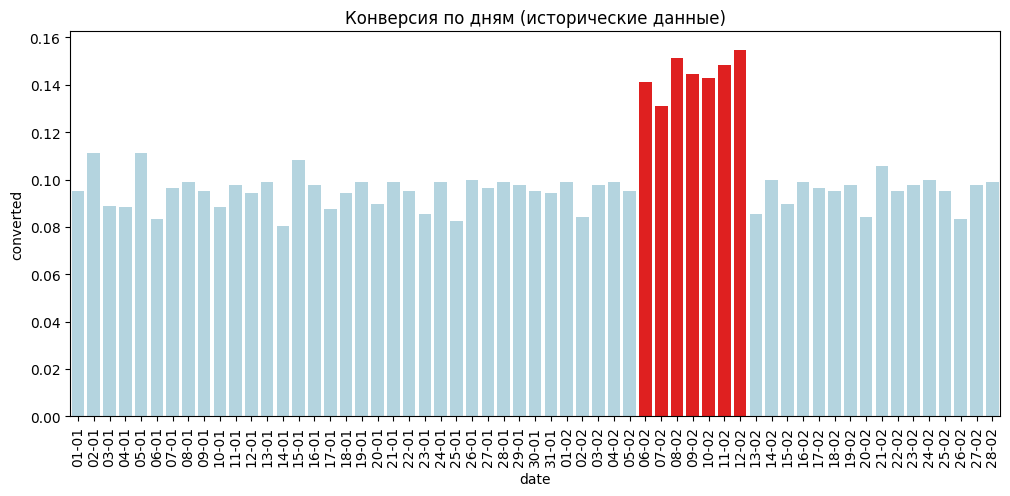

In [ ]:
# Посмотрим на изменении конверсии на исторических данных

plt.figure(figsize=(12,5))
colors = ['red' if c > 0.12 else 'lightblue' for c in historic_gr['converted']]
sns.barplot(data=historic_gr, x='date', y='converted', palette=colors)
plt.xticks(rotation=90)
date_form = DateFormatter("%d-%m")
plt.gca().xaxis.set_major_formatter(date_form)
plt.title('Конверсия по дням (исторические данные)');

Виден аномальный рост конверсии с 06 по 12 февраля. Неизвестно, что было в эту неделю, но рост конверсий никак не связан с ростом кол-ва пользователей (его не было, см график ниже), возможно была какая-то акция, необходимо исключить этот период из наблюдений как аномальный.

Также мы можем использовать этот аномальный рост конверсии как ориентир для нашей цели по поднятию конверсии.

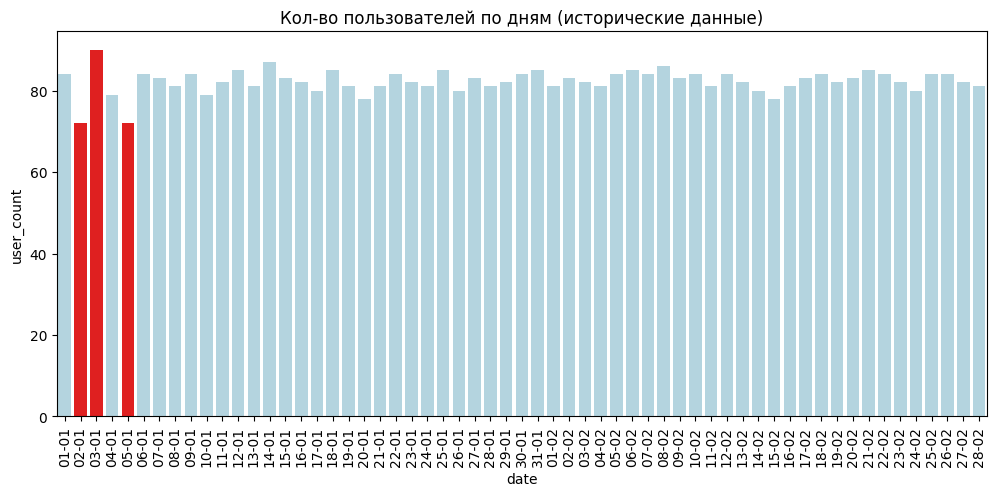

In [ ]:
# Посмотрим на изменение кол-ва пользователей на исторических данных

plt.figure(figsize=(12,5))
colors = ['red' if (c > historic_gr['user_count'].mean() * 1.06 or c < historic_gr['user_count'].mean() * 0.943) else 'lightblue' for c in historic_gr['user_count']]
sns.barplot(data=historic_gr, x='date', y='user_count', palette=colors)
plt.xticks(rotation=90)
date_form = DateFormatter("%d-%m")
plt.gca().xaxis.set_major_formatter(date_form)
plt.title('Кол-во пользователей по дням (исторические данные)');

Обратим внимание на сильные перепады в кол-ве пользователей сразу после нового года. Вероятно, стоит исключить их из выборки также, как аномальные.

In [ ]:
# Расчет конверсии в период проведения акции с 6 по 12 февраля:
historic_a = historic[(historic.date > '2023-02-05') & (historic.date < '2023-02-13')]
goal_conv = round(historic_a.converted.mean(), 5)
print("Коэффициент конверсии во время акции с 6 по 12 февраля -", goal_conv)

Коэффициент конверсии во время акции с 6 по 12 февраля - 0.1448


In [ ]:
# Расчет размера роста конверсии в период акции
historic_c = historic[((historic.date > '2023-01-05') & (historic.date <= '2023-02-05')) | (historic.date >= '2023-02-13')]
hist_conv = round(historic_c.converted.mean(), 3)
print("Ожидаемый эффект на основании ретроспективного анализа - рост конверсии на", round(goal_conv - hist_conv, 3) * 100, "%.")

Ожидаемый эффект на основании ретроспективного анализа - рост конверсии на 5.0 %.


Доформулируем гипотезу соостветствующим образом:

**После реализации персонализации e-mail-рассылок мы ожидаем получить рост метрики (коэффициента конверсии) с 9.5 до 14.5%.**

In [ ]:
# Дополнительно проверим взаимосвязь кол-ва пользователей с коэффициентом конверсии
# Здесь берем очищенные от аномалий значения

historic_grс = historic_gr.drop(historic_gr[((historic_gr.date < '2023-01-06') | (historic_gr.date > '2023-02-05')) & (historic_gr.date < '2023-02-13')].index)
print("Корреляция между числом пользователей и коэффициентом конверсии:", round(historic_grс[['converted', 'user_count']].corr().loc['converted', 'user_count'], 2))

Корреляция между числом пользователей и коэффициентом конверсии: -0.21


Отрицательная корреляция между числом пользователей и коэффициентом конверсии, хоть и небольшая, но нужно иметь ее в виду, поскольку она может оказывать негативное влияние на конверсию при росте числа пользователей.

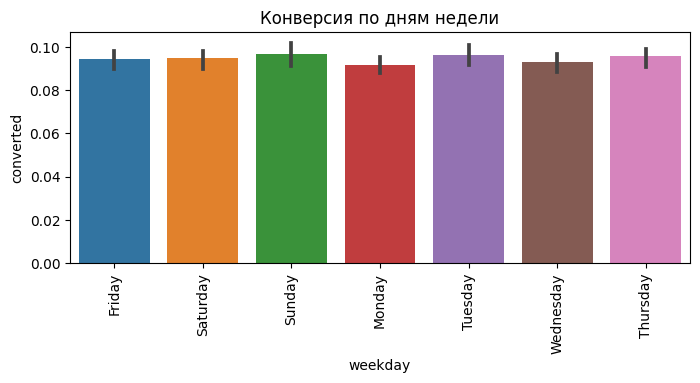

In [ ]:
# На всякий случай проверим, есть ли влияние дня недели на конверсию

plt.figure(figsize=(8,3))
sns.barplot(data=historic_grс, x='weekday', y='converted')
plt.xticks(rotation=90)
plt.title('Конверсия по дням недели');

Видимого влияния дня недели на данные нет.

Посмотрим, какие результаты получились у исторических данных бeз аномалий.

In [ ]:
historic_c.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3869.0,103762.510209,1354.533671,101629.0,102596.0,103563.0,105117.0,106084.0
converted,3869.0,0.094598,0.292697,0.0,0.0,0.0,0.0,1.0


In [ ]:
historic_grс.describe().T

,count,mean,std,min,25%,50%,75%,max
converted,47.0,0.094629,0.006208,0.08046,0.091931,0.096386,0.098765,0.108434
user_count,47.0,82.319149,1.946082,78.00000,81.000000,82.000000,84.000000,87.000000


  * Всего 3869 наблюдений за 47 дней (очищенные данные).
  * В среднем 82 пользователя в день, минимум - 78, максимум - 87 пользователей в день
  * Среднедневной коэффициент конверсии - 0.095, медианный - 0.096 (небольшая негативная асимметрия)
  * Минимальный наблюдаемый коэф. конверсии -	0.08, максимальный - 0.109

<h2>Задание 4.</h2>

**Рассчитайте требуемый размер выборки для анализа данных эксперимента.
При выполнении задания учитывайте, что на период тестирования новой фичи мы
увеличим количество рассылаемых писем в 3 раза, и соответственно ожидаем, что
количество открывших эти письма пропорционально увеличится примерно до 240 в
день.
Выполняя расчет, вы можете использовать любой доступный вам инструмент.**

In [ ]:
# Рассчитаем необходимый размер выборки

import math
import statsmodels.stats.api as sms

effect_size = sms.proportion_effectsize(hist_conv, goal_conv)
required_n = sms.NormalIndPower().solve_power(effect_size, power=0.8, alpha=0.05, ratio=1)
print("Для проведения эксперимента требуется", round(required_n), "пользователей в каждой группе, всего", round(required_n)*2, "пользователей.")
print("Рекомендуемое время проведения эксперимента -", math.ceil(required_n*2/240), "дней.")

Для проведения эксперимента требуется 661 пользователей в каждой группе, всего 1322 пользователей.
Рекомендуемое время проведения эксперимента - 6 дней.


In [ ]:
# Альтернативный расчет через внешний калькулятор mindbox
from IPython.display import Image
Image(url='https://drive.google.com/uc?export=view&id=1ukgAMlpMc433YSq7ybWkDNJyKCWROLRT')

<h2>Задание 5.</h2>

**Вы получили выгрузку по данным эксперимента за первые четыре дня после
запуска. Проанализируйте корректность течения эксперимента, сделайте и
зафиксируйте свои выводы.
Файл с данными — Data for monitoring - first 4 days.csv.
Важно: при проведении эксперимента в данных может присутствовать не одна
аномалия. Придумайте, какими способами вы можете выявить аномалии в ходе
эксперимента.**

In [ ]:
first = pd.read_csv('/content/drive/MyDrive/Data_analytics/data/Data for monitoring - first 4 days.csv')

In [ ]:
first.sample(1)

,date,group,user_id,converted
373,02.03.2023,treatment,106458,1


In [ ]:
first.groupby('group').converted.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
control,603.0,0.096186,0.295091,0.0,0.0,0.0,0.0,1.0
treatment,363.0,0.079890,0.271497,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Cгруппируем по датам для вычисления среднедневной конверсии

first.date = pd.to_datetime(first.date, dayfirst=True)
first_grouped = first.groupby(['group', 'date'], as_index=False).converted.mean()
first_grouped

,group,date,converted
0,control,2023-03-01,0.100840
1,control,2023-03-02,0.094488
2,control,2023-03-03,0.095238
3,control,2023-03-04,0.095238
4,treatment,2023-03-01,0.114754
5,treatment,2023-03-02,0.126050
6,treatment,2023-03-03,0.000000
7,treatment,2023-03-04,0.000000


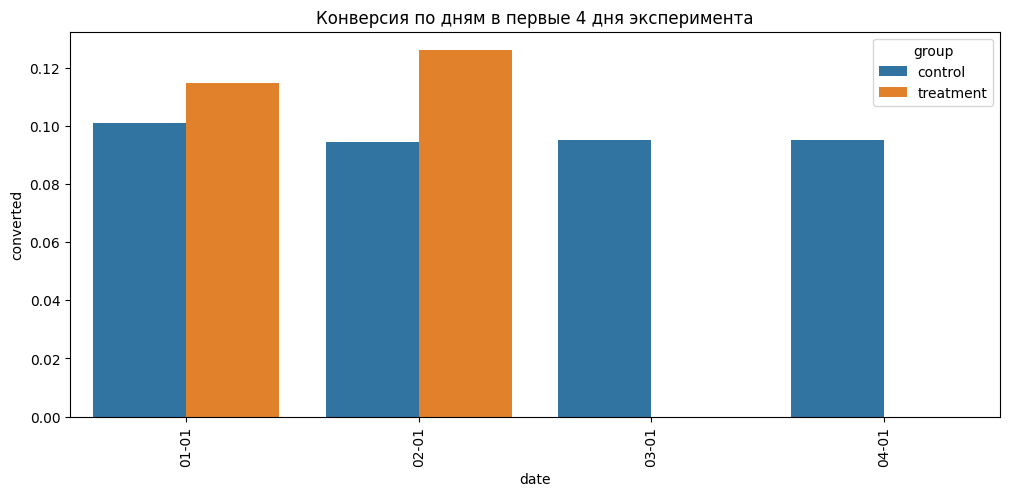

In [ ]:
# Посмотрим на изменении конверсии по дням экспериамента

plt.figure(figsize=(12,5))
sns.barplot(data=first_grouped, x='date', y='converted', hue='group')
plt.xticks(rotation=90)
date_form = DateFormatter("%d-%m")
plt.gca().xaxis.set_major_formatter(date_form)
plt.title('Конверсия по дням в первые 4 дня эксперимента');

Мы видим отсутствие данных за 3й и 4й день для тестовой группы. Необходимо проверить корректность выгрузки данных.

<h2>Задание 6.</h2>

**После окончания А/В-теста вы получили файл с выгрузкой результатов (файл Data for results.csv). Рассчитайте статистическую значимость различий между группами.
Сделайте выводы по проведенному расчету и интерпретируйте полученный
результат.**

In [ ]:
results = pd.read_csv('/content/drive/MyDrive/Data_analytics/data/Data for results.csv')

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1205 non-null   datetime64[ns]
 1   group      1205 non-null   object        
 2   user_id    1205 non-null   int64         
 3   converted  1205 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 37.8+ KB


In [ ]:
results.head(1)

,date,group,user_id,converted
0,01.03.2023,control,106085,1


In [ ]:
# Проверим, сколько раз встречаются одни и те же пользователи в датасете:
print("Пользователи встречаются в данных не более", results.user_id.value_counts().max(), "раза, дубликатов или повторных открытий писем нет.")

Пользователи встречаются в данных не более 1 раза, дубликатов или повторных открытий писем нет.


In [ ]:
results.groupby('date']

,count,mean,std,min,25%,50%,75%,max
user_id,1205.0,106687.000000,347.997845,106085.0,106386.0,106687.0,106988.0,107289.0
converted,1205.0,0.112863,0.316557,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Cгруппируем по датам для вычисления среднедневной конверсии и кол-ва пользователей в день

results.date = pd.to_datetime(results.date, dayfirst=True)
results_grouped = results.groupby(['group', 'date'], as_index=False).agg({'converted':'mean', 'user_id':'count'})
results_grouped = results_grouped.rename(columns={'user_id': 'user_count'})
results_grouped.describe().T

,count,mean,std,min,25%,50%,75%,max
converted,10.0,0.113175,0.014846,0.095238,0.10021,0.112657,0.125,0.135135
user_count,10.0,120.500000,4.352522,111.000000,119.25000,120.000000,121.750,127.000000


Мы видим, что средняя конверсия после начала эксперимента выросла, однако среднедневное число пользователей увеличилось только на 38 человек (с 82 до 120). С учетом того, что нам известно, что рассылка выросла в 3 раза, ожидалось около 240 пользователей в день. Неизвестно, что случилось, улетели письма в спам или рассылка оказалась массово неинтересна допольнительным пользователем, возможно, использовалась некачественная база для рассылки.

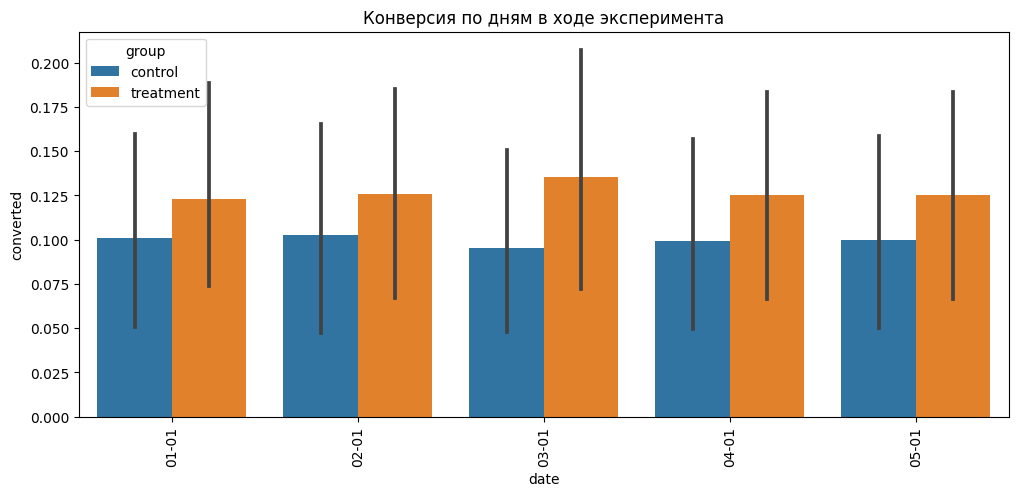

In [ ]:
# Посмотрим на изменении конверсии в течение срока проведения эксперимента

plt.figure(figsize=(12,5))
sns.barplot(data=results, x='date', y='converted', hue='group')
plt.xticks(rotation=90)
date_form = DateFormatter("%d-%m")
plt.gca().xaxis.set_major_formatter(date_form)
plt.title('Конверсия по дням в ходе эксперимента');

Видимых аномалий в данных о конверсии нет, проверим репрезентативность выборки, сравнив данные контрольной группы эксперимента с историческими. Для этого сформулируем гипотезу, что контрольные данные не имеют стастически значимых отличий от исторических, т.е. среднее контрольной группы эксперимента = среднему исторических данных (очищенных от аномалий). Для проверки используем t-тест Стьюдента:

In [ ]:
stats.ttest_ind(historic_grс.converted, results_grouped[results_grouped.group == 'control'].converted)

Ttest_indResult(statistic=-1.733470372223094, pvalue=0.08917549355387806)

Поскольку pvalue=0.09 (больше 0.05), можем заключить, что нет статистически значимой разницы между историческими данными и контрольной группой эксперимента.

In [ ]:
# Основные статистики экспериментальных данных
results.groupby('group').converted.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
control,613.0,0.099511,0.299591,0.0,0.0,0.0,0.0,1.0
treatment,592.0,0.126689,0.332906,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Кол-во переходов на сайт во время эксперимента
results.groupby('group').converted.sum()

group
control      61
treatment    75
Name: converted, dtype: int64

In [ ]:
# Проверка статистической значимости результатов

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = results[results['group'] == 'control']['converted']
treatment_results = results[results['group'] == 'treatment']['converted']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]
z_stat, pval = proportions_ztest(successes, nobs=nobs)

# А/B-тестирование
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')


z statistic: -1.49
p-value: 0.136
ci 95% for control group: [0.076, 0.123]
ci 95% for treatment group: [0.100, 0.153]


P-value свидетельствует, что выборки значимо не различаются, т.е. мы не можем сказать, что наш эксперимент прошел успешно.

In [ ]:
# Альтернативный расчет через внешний калькулятор mindbox
from IPython.display import Image
Image(url='https://drive.google.com/uc?export=view&id=1uw3ra-9CQvMgqCnc16yZkDwKcVVV5EAy')

<h2>Итоги</h2>
Мы провели А/В-тестирование гипотезы "После реализации персонализации e-mail-рассылок мы ожидаем получить рост метрики (коэффициента конверсии) с 9.5 до 14.5%."
По результатам эксперимента можем заключить, что статистически значимой разницы мы не получили, т.е. нельзя отвергнуть нулевую гипотезу о том, что контрольная и тестовая выборки не различаются.
Однако в ходе эксперимента были допущены различного вида неточности, что может привести к ошибке 2го рода:


  - При проведении эксперимента количество рассылаемых писем было увеличено в 3 раза, что само по себе может оказывать влияние на результаты, поскольку мы знаем о возможной отрицательной корреляции (на исторических данных составила -0.21). Но мы дополнительно знаем, что среднее число получателей увеличилось только на 38 человек, а не в 3 раза (фактический рост с 82 до 120). Почему так произошло - данных нет, можем только предположить, что письма или не дошли до получателей, или оказались массово неинтересны и не были открыты (возможные причины: технический сбой в рассылке, срабатывание спам-фильтра, некачественная база е-мейл).
  - Для правильного подсчета результатов эксперимент даже с искусственным завышением числа пользователей дополнительными рассылками должен был иметь длительность 6, а не 5 дней, это также могло привести к неадекватности выводов.
  - И наконец, надо отметить отсутствие данных для расчета адекватных смежных метрик, из-за чего мы не можем оценить, насколько наш эксперимент на самом деле повлиял на поведение пользователей.